# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys1 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | chonchi
Processing Record 3 of Set 1 | togur
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | palikir - national government center
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | daru
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | san benito
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | constantia
Processing 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,11.66,83,75,10.80,GB,1707073227
1,chonchi,-42.6128,-73.8092,24.82,30,3,0.97,CL,1707072982
2,togur,58.3631,82.8265,-4.36,96,100,4.47,RU,1707073490
3,palikir - national government center,6.9248,158.1611,26.41,83,100,4.63,FM,1707073312
4,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID", encoding="utf-8")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,11.66,83,75,10.80,GB,1707073227
1,chonchi,-42.6128,-73.8092,24.82,30,3,0.97,CL,1707072982
2,togur,58.3631,82.8265,-4.36,96,100,4.47,RU,1707073490
3,palikir - national government center,6.9248,158.1611,26.41,83,100,4.63,FM,1707073312
4,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

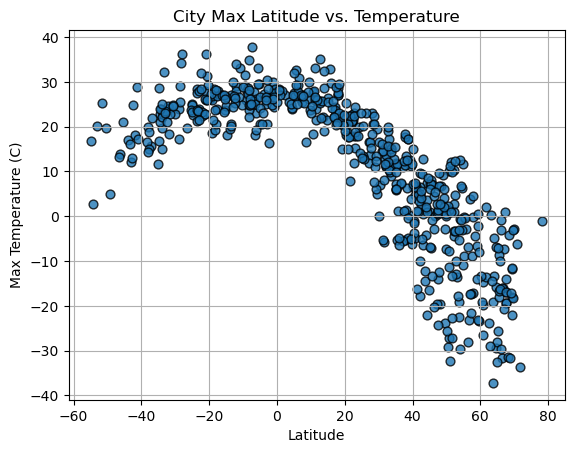

In [30]:
# Build scatter plot for latitude vs. temperature
scat_fig1 = city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors='black', linewidths=1, s=40, alpha= .8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

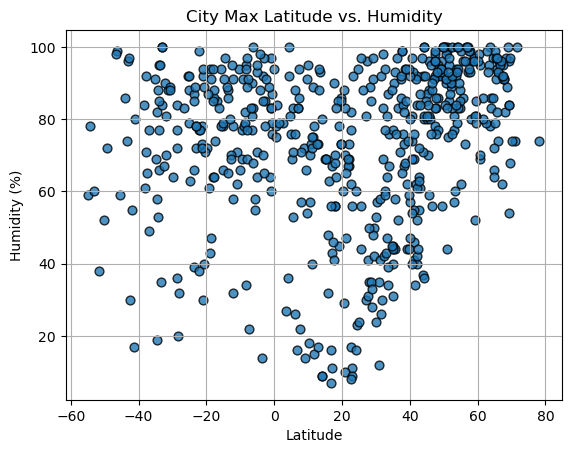

In [31]:
# Build the scatter plots for latitude vs. humidity
scat_fig2 = city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', linewidths=1, s=40, alpha= .8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

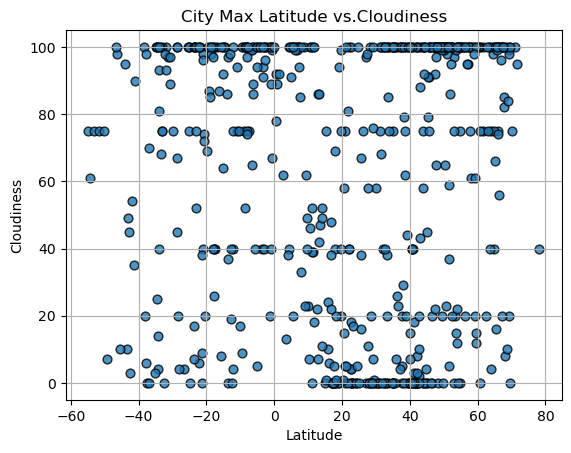

In [32]:
# Build the scatter plots for latitude vs. cloudiness
scat_fig3 = city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', linewidths=1, s=40, alpha= .8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs.Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

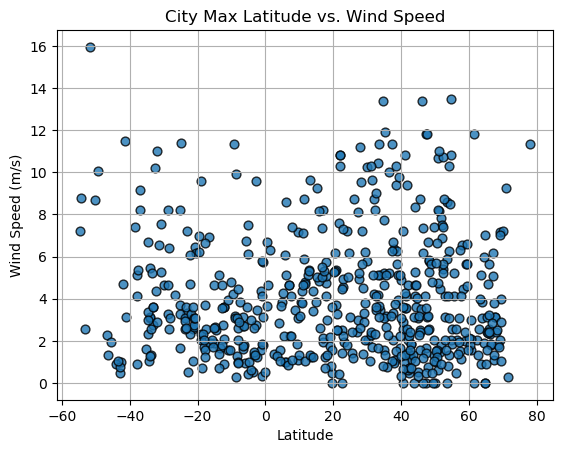

In [33]:
# Build the scatter plots for latitude vs. wind speed
scat_fig4 = city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', linewidths=1, s=40, alpha= .8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


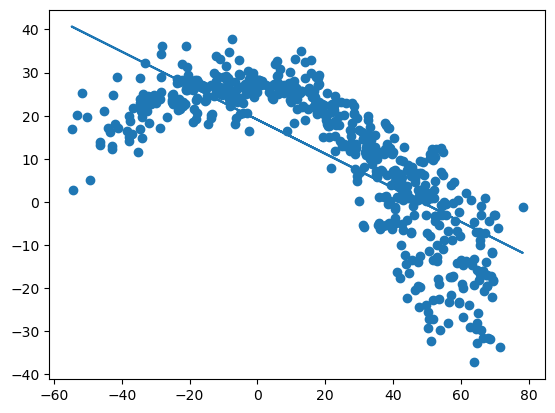

In [34]:
# Define a function to create Linear Regression plots
#lat = city_data_df['Lat']
#max_temp = city_data_df['Max Temp']

x_values = city_data_df['Lat'].astype("float")
y_values = city_data_df['Max Temp'].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_value)

plt.show()



In [45]:
# Define a function to create Linear Regression plots

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Define the Linear Regression Line Formula
def linear_regression_line(x_values):
    return slope * x_values + intercept

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,11.66,83,75,10.80,GB,1707073227
2,togur,58.3631,82.8265,-4.36,96,100,4.47,RU,1707073490
3,palikir - national government center,6.9248,158.1611,26.41,83,100,4.63,FM,1707073312
5,sur,22.5667,59.5289,21.43,62,4,2.51,OM,1707073367
8,anadyr,64.7500,177.4833,-15.72,66,100,7.00,RU,1707073000


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chonchi,-42.6128,-73.8092,24.82,30,3,0.97,CL,1707072982
4,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707072968
6,grytviken,-54.2811,-36.5092,2.72,78,61,8.77,GS,1707073289
7,bredasdorp,-34.5322,20.0403,22.87,82,25,2.30,ZA,1707072967
10,daru,-9.0763,143.2092,25.95,91,100,3.18,PG,1707073062


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8545271038858057


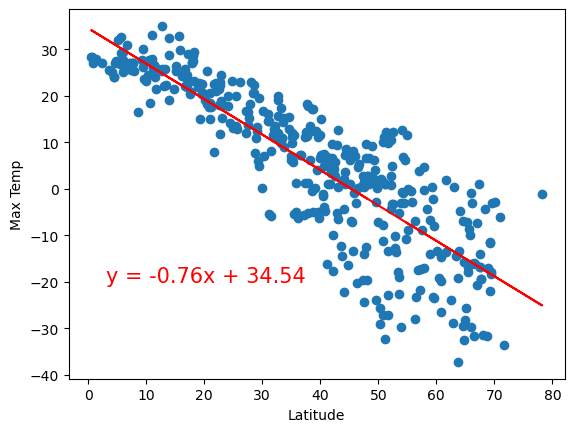

In [51]:
# Linear regression on Northern Hemisphere

# convert to floats and store x and y values
x_values = northern_hemi_df['Lat'].astype("float")
y_values = northern_hemi_df['Max Temp'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (3,-20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

The r-value is: 0.5302843657727535


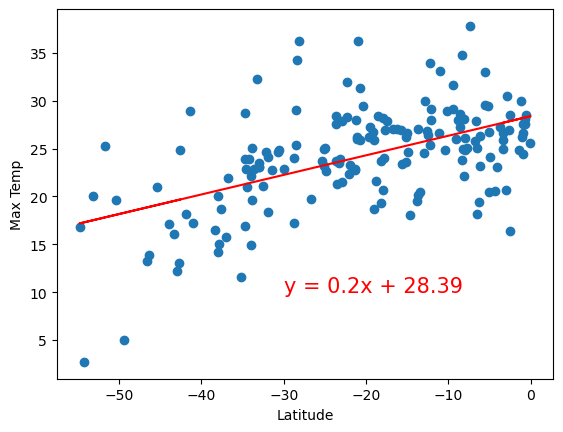

In [38]:
# Linear regression on Southern Hemisphere

# convert to floats and store x and y values
x_values = southern_hemi_df['Lat'].astype("float")
y_values = southern_hemi_df['Max Temp'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (-30,10), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, latitude increases as you move away from the equator towards the North Pole. The inverse relationship between latitude and maximum temperature is expected. This aligns with the general understanding that temperatures generally decreases in the Northern Hemisphere as you move towards higher latitudes.  

On the other hand, in the Southern Hemisphere, the direct relationship between latitude and maximum temperature aligns with the pattern of increasing temperatures as you move towards the equator from the South Pole.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4411559681091668


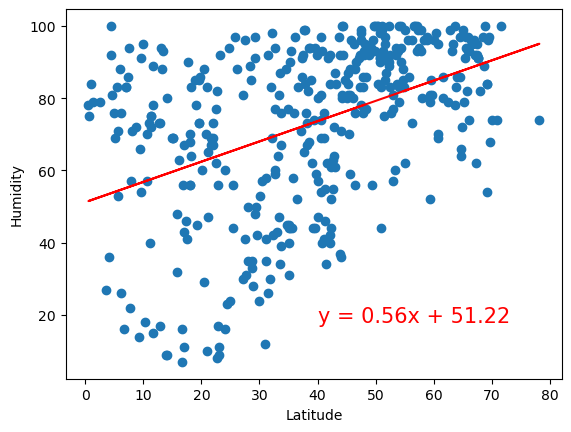

In [39]:
# Northern Hemisphere
# convert to floats and store x and y values
x_values = northern_hemi_df['Lat'].astype("float")
y_values = northern_hemi_df['Humidity'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (40,18), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

The r-value is: 0.16384249416796934


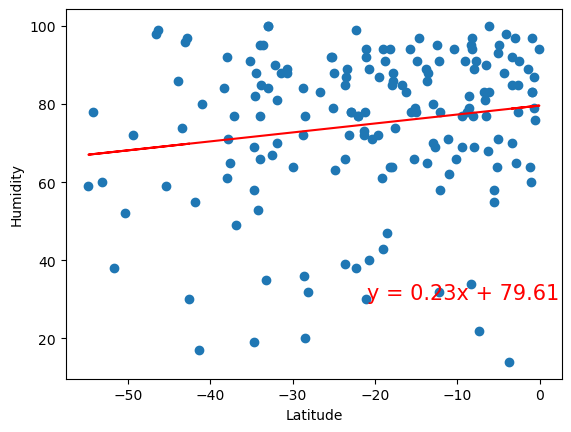

In [40]:
# Southern Hemisphere

# convert to floats and store x and y values
x_values = southern_hemi_df['Lat'].astype("float")
y_values = southern_hemi_df['Humidity'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (-21,30), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

**Discussion about the linear relationship:** 
The Northern Hemisphere linear regression model suggests a slightly positive slope, indicating that humidity tends to increase as you move away from the equator towards higher latitudes. Similarly, the Southern Hemisphere linear regression plot shows a comparable positive slope, suggesting that humidity tends to increase as you move towards the equator and away from the South Pole. 

While these trends are noticeable, it's essential to note that looking closely at the data reveals correlation coefficents (r values) for both hemispheres are close to zero. This suggests a weak linear relationship between latitude and humidity. 

Moreover, the presence of outliers in the scatter plots underlines that the variability in humidity cannot be explainby solely by latitude. Other factors like proximity to bodies of water, wind patterns, or other geographical features could be analyzed to understand the complex relationships and correlations affecting humidity levels in different regions. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23783438486270025


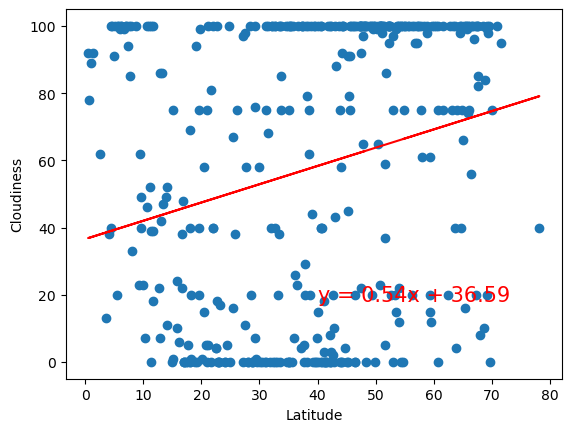

In [41]:
# Northern Hemisphere
# convert to floats and store x and y values
x_values = northern_hemi_df['Lat'].astype("float")
y_values = northern_hemi_df['Cloudiness'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (40,18), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

The r-value is: 0.22773026360444365


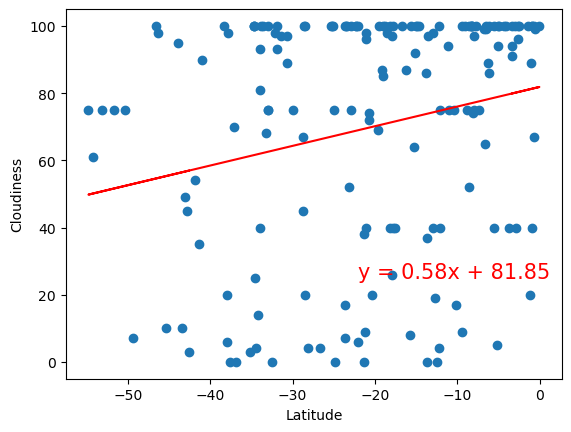

In [42]:
# Southern Hemisphere

# convert to floats and store x and y values
x_values = southern_hemi_df['Lat'].astype("float")
y_values = southern_hemi_df['Cloudiness'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (-22,25), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

**Discussion about the linear relationship:** 
The linear regression relationship between cloudiness and latitude in both the Northern and Southern Hemispheres exhibits a positive slope. This indicates a general trend that cloudiness tends to increase as one moves away from the equator towards higher latitudes in the Northern Hemisphre and towards the equator from the South Pole in the Southern Hemisphere.

Upon closer inspection of the scatter plots, it becomes apparent that the data points are widely dispersed, lacking a clear pattern or correlation. The scatter plots cover the entire graph, indicating a high degree of variability in cloudiness levels that cannot be solely explained by changes in latitude. This is further supported by the correlation coefficients, which are close to zero, suggesting a weak or negligible linear relationship between cloudiness and latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04671474799769823


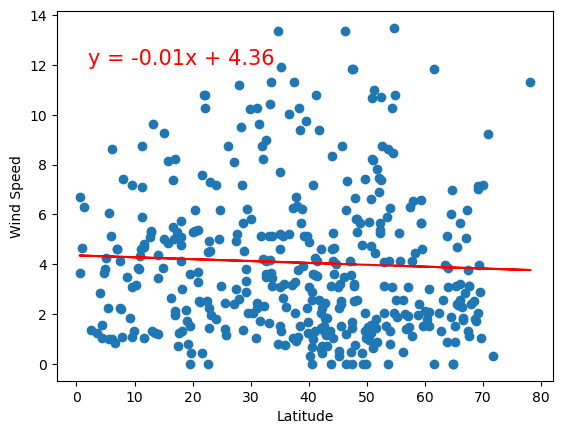

In [49]:
# Northern Hemisphere

# convert to floats and store x and y values
x_values = northern_hemi_df['Lat'].astype("float")
y_values = northern_hemi_df['Wind Speed'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (2,12), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

The r-value is: -0.28274420142956436


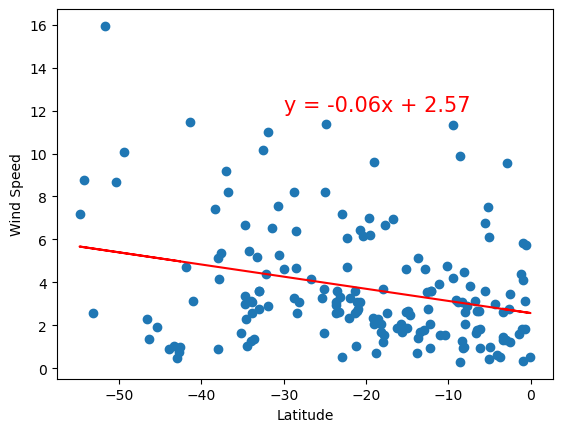

In [44]:
# Southern Hemisphere

# convert to floats and store x and y values
x_values = southern_hemi_df['Lat'].astype("float")
y_values = southern_hemi_df['Wind Speed'].astype("float")

# run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter plot
plt.scatter(x_values, y_values)

# plot regression line
plt.plot(x_values, regress_value, "r-")
plt.annotate(line_eq, (-30,12), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is: {rvalue}")

# show plot
plt.show()

**Discussion about the linear relationship:** 

The linear regression analysis reveals a slight negative slope in the relationship between Wind Speed and latitude for both the Northern and Southern Hemispheres. The subtle slope suggests a minor decrease in wind speed from higher to lower latitudes.

Furthermore, the presence of outliers reinforces the notion of an undefined relationship between Wind Speed and latitude. The correlation coefficients, with values close to zero, provide additional evidence that indicate a minimal to no correlation between latitude and Wind Speed.
